In [5]:
import numpy as np
import matplotlib.pyplot as plt
import PIL
from astropy.io import fits
import pylab
from scipy import interpolate
import sys

%matplotlib inline

In [6]:
hdulist1 = fits.open('testQimage1.fits')
hdulistPSF = fits.open('psf_178.168914766_-0.501176508188.fits')


In [8]:
hdulist1.info()
hdulistPSF.info()
#hdulist.close()

Filename: testQimage1.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      21   ()              
1    IMAGE       ImageHDU        34   (120, 120)   float32   
2                ImageHDU         5   ()              
3                ImageHDU         5   ()              
Filename: psf_178.168914766_-0.501176508188.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      16   (43, 43)     float64   


In [10]:
im1 = hdulist1[1].data
psf = hdulistPSF[0].data
size1 = im1.shape
sizePsf = psf.shape


(0, 39)

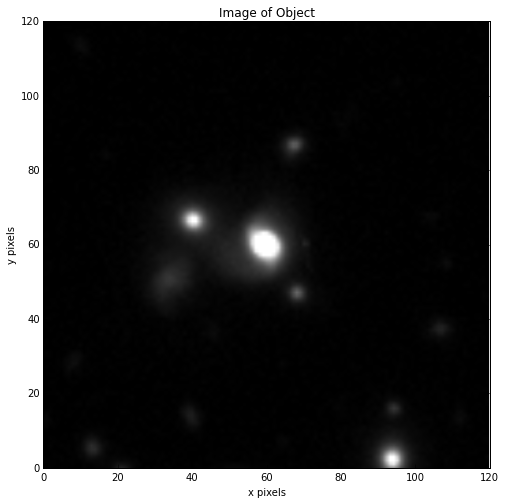

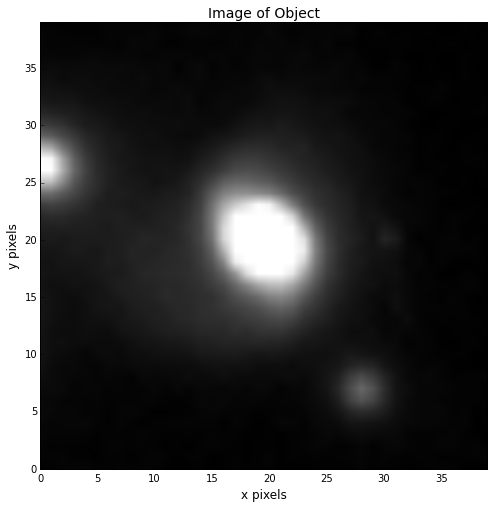

In [31]:
pylab.figure(figsize=(8,8))
#pylab.clf()
pylab.gray()
pylab.imshow(im1, vmin = 0, vmax = 10)

pylab.xlabel('x pixels')
pylab.ylabel('y pixels')
pylab.title("Image of Object")
pylab.ylim([0, size1[0]])
pylab.xlim([0, size1[1]])

smallerIm = im1[40:80, 40:80]
smallsize = smallerIm.shape

#smallerMask = mask[40:80, 40:80]
#smallmasksize = smallerMask.shape



pylab.figure(figsize=(8,8))
pylab.imshow(smallerIm, vmin = 0, vmax = 10)

pylab.xlabel('x pixels', size = 12)
pylab.ylabel('y pixels', size = 12)
pylab.title("Image of Object", size = 14)
pylab.ylim([0, smallsize[0]-1])
pylab.xlim([0, smallsize[1]-1])

#pylab.figure(figsize=(8,8))
#pylab.imshow(smallerIm[8:32, 8:32], vmin = 0, vmax = 10)
#smallsize = (smallerIm[8:32, 8:32]).shape

#pylab.xlabel('x pixels')
#pylab.ylabel('y pixels')
#pylab.title("Image of Object")
#pylab.ylim([0, smallsize[0]])
#pylab.xlim([0, smallsize[1]])


1849


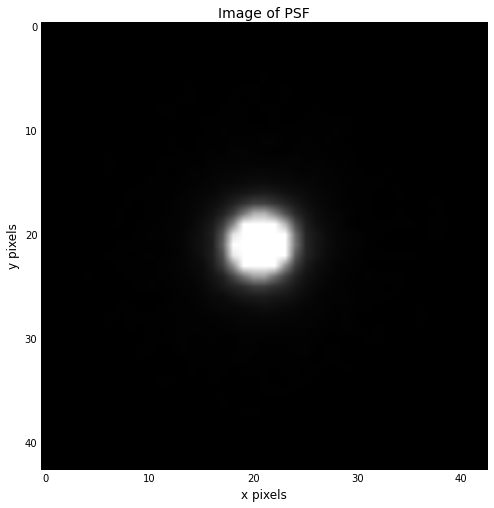

In [32]:
pylab.figure(figsize=(8,8))
#pylab.clf()

pylab.gray()
pylab.imshow(psf, vmin = 0, vmax = .01)
print (psf).size

pylab.xlabel('x pixels', size = 12)
pylab.ylabel('y pixels', size = 12)
pylab.title("Image of PSF", size = 14)

#21 21 middle


# graph zeropoint - 2.5log10(f_v / (0.168)^2) for surface brightness!


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:35: RuntimeWarning: invalid value encountered in log10
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:36: RuntimeWarning: invalid value encountered in log10


(-0.01, 1.6800000000000002)

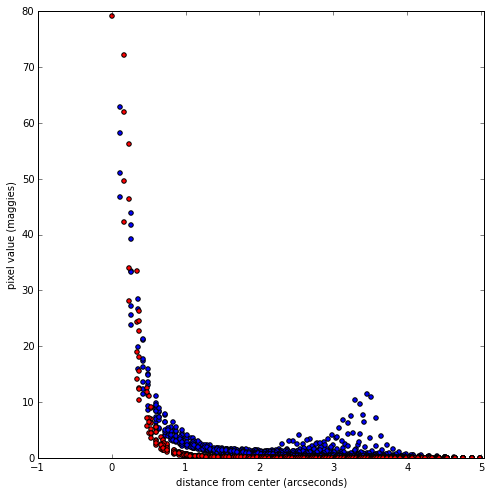

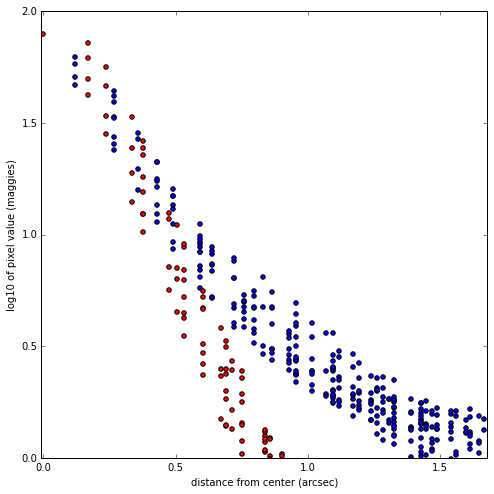

In [33]:
# calculate distance from center to any pixel
nx, ny = smallerIm.shape
x = np.arange(nx) - (nx-1)/2. 
y = np.arange(ny) - (ny-1)/2.
X, Y = np.meshgrid(x, y)
d = np.sqrt(X**2 + Y**2)


nxp, nyp = psf.shape
xp = np.arange(nxp) - (nxp-1)/2. 
yp = np.arange(nyp) - (nyp-1)/2.
Xp, Yp = np.meshgrid(xp, yp)
d_psf = np.sqrt(Xp**2 + Yp**2)



#f2 = interp1d(d_psf, psf, kind='cubic')



    

pylab.figure(figsize=(8,8))
plt.scatter(d * .168, smallerIm)    # changed to scatter from plot
plt.scatter(d_psf * .168, psf * 1e3, c = 'red')
pylab.xlabel('distance from center (arcseconds)')
pylab.ylabel('pixel value (maggies)')
pylab.ylim([0, 80])
pylab.xlim([-1, 30 * .168]) # 30 pixels

#print psf
#print smallerIm

pylab.figure(figsize=(8,8))
plt.scatter(d * .168, np.log10(smallerIm))    # changed to scatter from plot
plt.scatter(d_psf * .168, np.log10(psf * 1e3), c = 'red')
pylab.xlabel('distance from center (arcsec)')
pylab.ylabel('log10 of pixel value (maggies)')
pylab.ylim([0, 2])
pylab.xlim([-.01, 10 * .168]) # 10 pixels

#print smallerIm
#print d



# take average of each pixel distance
# spline
# don't average object data, only psf





# convolve -> I = integral I(x',y') * PSF (x - x', y - y')dx'dy' / integral(PSF dxdy)

# 1D convolve I(r) = integral (Model(r') * PSF(abs(r - r')) dr')



# do below without convolving first
# chi^2 = sum over pixels of (A*PSF + B*(galaxymodel convolved with PSF) - data)^2 ---- > no smoothing
# value at pixel and per pixel
# partial Chi A = 0
# partial chi B = 0
# loop over n and R_e for sersic
# minmize chi



# sersic - gamma function from integrating 0 to infinity I(R) * 2 *pi*r dr , sub x = R/R_e
# I_e R_e^2 * integral from 0 to x' of exp(-b_n(x^1/n -1))x*dx = Z_n(x')
# what is b_n such that Z(x'=1) / Z(x' = infinity) = 1/2 (half light)

# 1/2 of ^ THAT INTEGRAL = integral from 0 to r_E of I_E * 2 * pi* r *dr
# answer of the form I_e r_e^2 * gamma function(r)

In [34]:
re_val = np.linspace(0, 20, 40) # In pixels.

n_val = [0.500000, 0.511646, 0.523564, 0.535760, 0.548239, 0.561009, 0.574077, 0.587449, 0.601132, 0.615134, 
        0.629463, 0.644125, 0.659128, 0.674481, 0.690192, 0.706269, 0.722720, 0.739554, 0.756781, 0.774408, 0.792447,
        0.810905, 0.829793, 0.849122, 0.868900, 0.889140, 0.909850, 0.931044, 0.952730, 0.974922, 0.997631, 1.02087, 
        1.04465, 1.06898, 1.09388, 1.11936, 1.14543, 1.17211, 1.19942, 1.22735, 1.25594, 1.28520, 1.31513, 1.34577,
        1.37711, 1.40919, 1.44202, 1.47560, 1.50998, 1.54515, 1.58114, 1.61797, 1.65566, 1.69422, 1.73368, 
        1.77407, 1.81539, 1.85768, 1.90095, 1.94523, 1.99054, 2.03690, 2.08435, 2.13290, 2.18258, 2.23342, 2.28544, 
        2.33868, 2.39315, 2.44889, 2.50594, 2.56431, 2.62404, 2.68516, 2.74770, 2.81171, 2.87720, 2.94422, 3.01280,
        3.08297, 3.15479, 3.22827, 3.30347, 3.38041, 3.45915, 3.53973, 3.62218, 3.70655, 3.79289, 3.88124,
        3.97164, 4.06415]

b_n_val = [0.693147,  0.715714, 0.738844, 0.762549, 0.786841, 0.811733, 0.837242, 0.863377, 0.890152, 0.917581, 
          0.945678, 0.97428497, 1.00414, 1.03425, 1.06512, 1.09675, 1.12917, 1.16237, 1.19659, 1.23123, 1.26689,
          1.3031702, 1.34075, 1.37902, 1.41820, 1.45832, 1.49938, 1.54143, 1.58446, 1.62852, 1.67362, 1.71979, 
          1.76705, 1.81544, 1.86496, 1.91565, 1.96754, 2.02064, 2.07499, 2.1305065, 2.18777, 2.24595, 2.30554, 2.36656, 
          2.4288661, 2.49298, 2.5581791, 2.62540, 2.69396, 2.76411, 2.83590, 2.90938, 2.98457, 3.06153, 3.14028, 
          3.22088, 3.30337, 3.38779, 3.47419, 3.56261, 3.65330, 3.74587, 3.84060, 3.93754, 4.03676, 4.13830, 4.24222, 
          4.34858, 4.45718, 4.5686032, 4.68289, 4.79944, 4.9186685, 5.04102, 5.16591, 5.29381, 5.42469, 5.55860, 5.69563,
          5.83585, 5.97934, 6.1266911, 6.2769893, 6.4308184, 6.58776, 6.74889, 6.91379, 7.08253, 7.25517, 7.4316895, 
          7.61277, 7.79751]




def sersic(n, b_n, re, r): 
    return np.e**(-b_n*((r / re)**(1./n) -1))



In [38]:
# sum (data * psf) = A * sum(psf^2) + B sum(psf * galaxy)
# CHI SQUARED Fitting for galaxy and psf model data


def calcAB(re, data):
    tot = 0
    
    allChi = []
    allA = []
    allB = []
        
    
    for k in range(92):

        sum1 = 0.
        sum1A = 0.
        sum1B = 0.
        dist = 0.
        
        sum2 = 0.
        sum2A = 0.
        sum2B = 0.
        n = n_val[k]
        b_n = b_n_val[k]
        
        
        
        #print "For a n, b_n of: ", n, b_n 
        
        # tigher pixel range for images
        for i in range(8, 32):   # start from 1 to avoid accessing -1 for data, end at 40 cause data ends at 40
            for j in range(8, 32):
                r = np.sqrt((i -1 - 20)**2 + (j -1 - 20)**2) # data centered at 20 20     -1!!!!!!
                sum1 += data[i-1][j-1] * psf[i][j]
                sum1A += psf[i][j] * psf[i][j]
                sum1B += psf[i][j] * sersic(n, b_n, re, r)
                
                sum2 += data[i-1][j-1] * sersic(n, b_n, re, r)     #     -1!!!!!!!!
                sum2A += psf[i][j] * sersic(n, b_n, re, r)
                sum2B += (sersic(n, b_n, re, r))**2    
        #print "Derivative of A: ", sum1, sum1A, sum1B
        #print "Derivative of B: ", sum2, sum2A, sum2B
        
        # solve for A and B
        a = ([[sum1A, sum1B],[sum2A, sum2B]])
        b = ([sum1, sum2])
        
        A, B = np.linalg.solve(a, b)
        allA.append(A)
        allB.append(B)
        #print "A, B coefficients are: ", A, B
        allChi.append(calcChi2(re, A, B, n, b_n, data))
        
    #print "A VALUES: ", allA
    #print
    #print "B VALUES: ", allB
    #print
    #print "CHI VALUES: ", allChi
    return chiMin(allChi, allA, allB)

    
    
    
    
    
def calcChi2(re, A, B, n, b_n, data):
    chi2 = 0.  
    for i in range (8, 32):
        for j in range(8, 32):   # tighter boundaries
            r = np.sqrt((i -1 - 20)**2 + (j -1 - 20)**2) # data centered at 20 20         ## -1!!!!!
            chi2 += (A * psf[i][j] + B * sersic(n, b_n, re, r) - data[i-1][j-1])**2   ## data -1 !!!!!!
            
    #print "Chi^2 is: ", chi2
    return chi2
    #print "Chi^2 is: ", chi2, " for A, B = ", A, B, " b_n = ", b_n, " n = ", n



    
    
    
def chiMin(allChi, allA, allB):  
    chiMin = sys.maxint
    lowIndex = 100.
    for i in range(len(allChi)):
        if allChi[i] < chiMin:
            chiMin = allChi[i]
            lowIndex = i        # values that minimize chi2
            
    #print lowIndex
    #print "The Min Chi is: ", chiMin, " for A, B: ", allA[lowIndex], allB[lowIndex], " and b_n and n of ", b_n_val[lowIndex], n_val[lowIndex]
    return chiMin, allA[lowIndex], allB[lowIndex], b_n_val[lowIndex], n_val[lowIndex]
#calcAB(3)

In [39]:
chiList = []
nList = []
chiMini = sys.maxint
for i in range(1, 40):
    chi, A, B, b_n, n = calcAB(re_val[i], smallerIm)
    chiList.append(chi)
    nList.append(n)
    if chi < chiMini:
        chiMini = chi
    print i, " - RE of ", re_val[i]
print chiMini

1  - RE of  0.512820512821
2  - RE of  1.02564102564
3  - RE of  1.53846153846
4  - RE of  2.05128205128
5  - RE of  2.5641025641
6  - RE of  3.07692307692
7  - RE of  3.58974358974
8  - RE of  4.10256410256
9  - RE of  4.61538461538
10  - RE of  5.12820512821
11  - RE of  5.64102564103
12  - RE of  6.15384615385
13  - RE of  6.66666666667
14  - RE of  7.17948717949
15  - RE of  7.69230769231
16  - RE of  8.20512820513
17  - RE of  8.71794871795
18  - RE of  9.23076923077
19  - RE of  9.74358974359
20  - RE of  10.2564102564
21  - RE of  10.7692307692
22  - RE of  11.2820512821
23  - RE of  11.7948717949
24  - RE of  12.3076923077
25  - RE of  12.8205128205
26  - RE of  13.3333333333
27  - RE of  13.8461538462
28  - RE of  14.358974359
29  - RE of  14.8717948718
30  - RE of  15.3846153846
31  - RE of  15.8974358974
32  - RE of  16.4102564103
33  - RE of  16.9230769231
34  - RE of  17.4358974359
35  - RE of  17.9487179487
36  - RE of  18.4615384615
37  - RE of  18.9743589744
38  - RE of

39


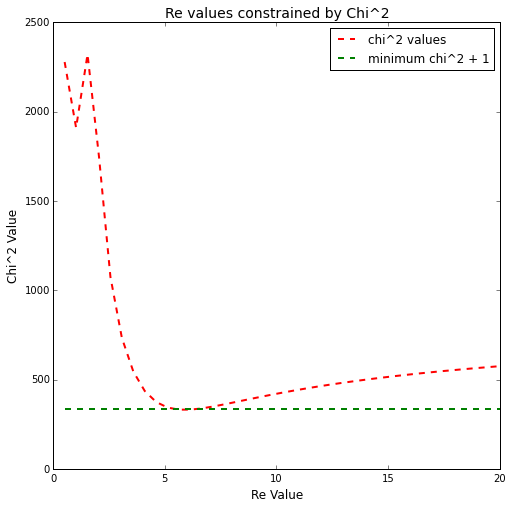

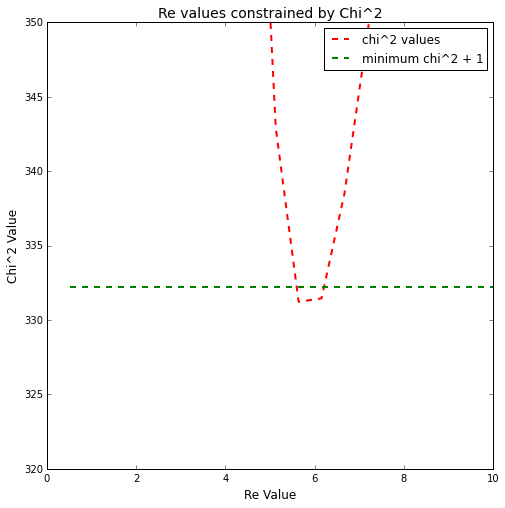

In [44]:
print len(chiList)

ones = np.ones(39)

pylab.figure(figsize=(8,8))
plt.plot(re_val[1:], chiList, 'r--',  label = "chi^2 values", linewidth = 2.0)
plt.plot(re_val[1:], 332.220385708 * ones, 'g--', label = "minimum chi^2 + 1", linewidth = 2.0)
plt.title("Re values constrained by Chi^2", size = 14)
pylab.xlabel('Re Value', size = 12)
pylab.ylabel('Chi^2 Value', size = 12)
plt.legend()
plt.show()

pylab.figure(figsize=(8,8))
plt.plot(re_val[1:], chiList, 'r--',  label = "chi^2 values", linewidth = 2.0)
plt.plot(re_val[1:], 332.220385708 * ones, 'g--', label = "minimum chi^2 + 1", linewidth = 2.0)
plt.title("Re values constrained by Chi^2", size = 14)
pylab.xlabel('Re Value', size = 12)
pylab.ylabel('Chi^2 Value', size = 12)
pylab.ylim([320, 350])
pylab.xlim([0, 10]) # 30 pixels

plt.legend()
plt.show()

#pylab.figure(figsize=(8,8))
#plt.scatter(nList, chiList,  label = "chi^2 values")
#plt.plot(332.220385708 * ones, nList,  'g--', label = "chi^2 + 1")
#plt.title("Re values constrained by Chi^2")
#pylab.xlabel('N Value', size = 12)
#pylab.ylabel('Chi^2 Value', size = 12)
#plt.legend()
#plt.show()




[  1.29589376e+01   1.04366972e+01   8.08323722e+00   6.15388567e+00
   4.63014306e+00   3.45213445e+00   2.55470501e+00   1.87860835e+00
   1.37380377e+00   9.99707756e-01   7.24255564e-01   5.22578579e-01
   3.75658769e-01   2.69114153e-01   1.92168520e-01   1.36810227e-01
   9.71230559e-02   6.87640351e-02   4.85619227e-02   3.42121094e-02
   2.40470548e-02   1.68649875e-02   1.18029976e-02   8.24360979e-03
   5.74638865e-03   3.99812195e-03   2.77670169e-03   1.92504622e-03
   1.33234469e-03   9.20616190e-04]


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:32: RuntimeWarning: invalid value encountered in log10
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:33: RuntimeWarning: invalid value encountered in log10
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:45: RuntimeWarning: invalid value encountered in log10
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:46: RuntimeWarning: invalid value encountered in log10


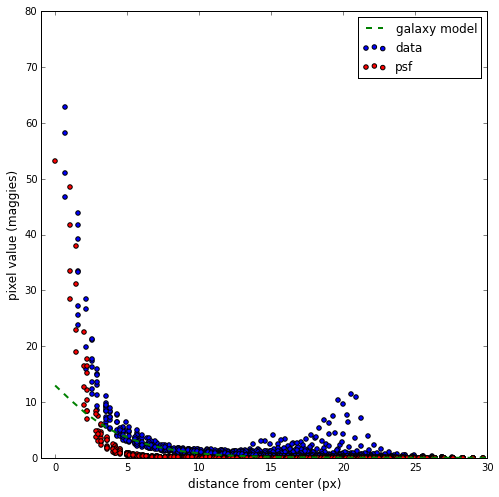

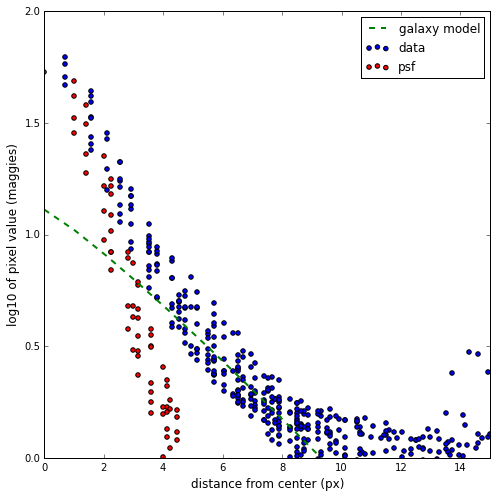

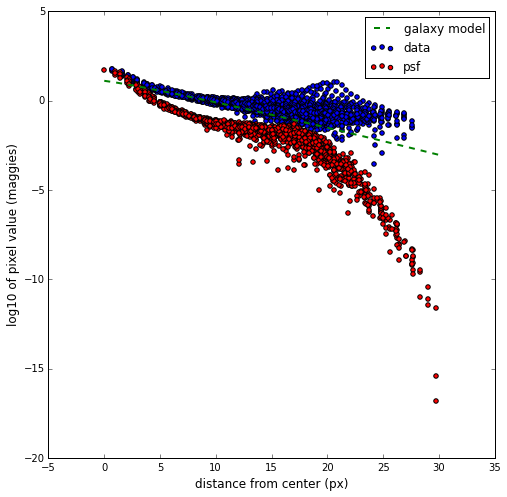

In [189]:
#### 
### THESE GRAPHS ARE IN THE I-BAND

####
# 673.169892266 3.01459565927  and b_n and n of  1.45832 0.88914
A = 673.169892266
B = 3.01459565927
b_n = 1.45832 
n =  0.88914
re = 5.64102564103

r = np.linspace(0, 30, 30)
galaxy = B * sersic(n, b_n, re, r)
galaxy = np.asarray(galaxy)
#np.e**(- b_n * ((r / re)**(1. / n) - 1))

print galaxy


pylab.figure(figsize=(8,8))
plt.scatter(d, smallerIm, label='data')    # changed to scatter from plot
plt.scatter(d_psf, psf *  A, c = 'red', label='psf')
plt.plot(r, galaxy, 'g--', linewidth=2.0, label='galaxy model')
plt.legend()
pylab.xlabel('distance from center (px)', size = 12)
pylab.ylabel('pixel value (maggies)', size = 12)
pylab.ylim([0, 80])
pylab.xlim([-1, 30]) # 30 pixels

#print psf
#print smallerIm

pylab.figure(figsize=(8,8))
plt.scatter(d, np.log10(smallerIm), label = 'data')    # changed to scatter from plot
plt.scatter(d_psf, np.log10(psf *  A), c = 'red', label = 'psf')
plt.plot(r, np.log10(galaxy), 'g--', linewidth=2.0, label = 'galaxy model')
plt.legend()
pylab.xlabel('distance from center (px)', size= 12)
pylab.ylabel('log10 of pixel value (maggies)', size = 12)
pylab.ylim([0, 2])
pylab.xlim([-.01, 15]) # 10 pixels




pylab.figure(figsize=(8,8))
plt.scatter(d, np.log10(smallerIm), label = 'data')    # changed to scatter from plot
plt.scatter(d_psf, np.log10(psf *  A), c = 'red', label = 'psf')
plt.plot(r, np.log10(galaxy), 'g--', linewidth=2.0, label = 'galaxy model')
plt.legend()
pylab.xlabel('distance from center (px)', size= 12)
pylab.ylabel('log10 of pixel value (maggies)', size = 12)




#print smallerIm
#print d


# do galaxy + PSF -- below
# ignore outer objects -- subset of object/psf
# find flux of galaxy
# speed up code with arrays


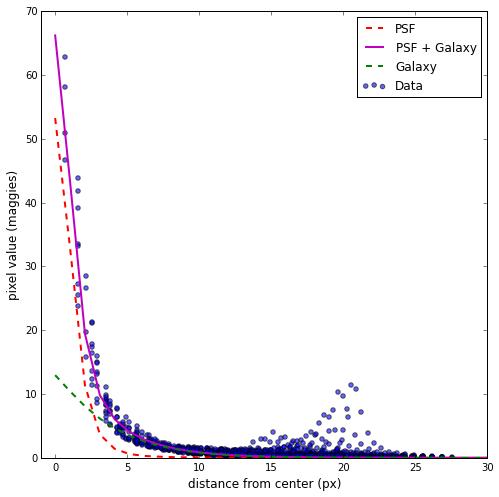

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:39: RuntimeWarning: invalid value encountered in log10
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:42: RuntimeWarning: invalid value encountered in log10


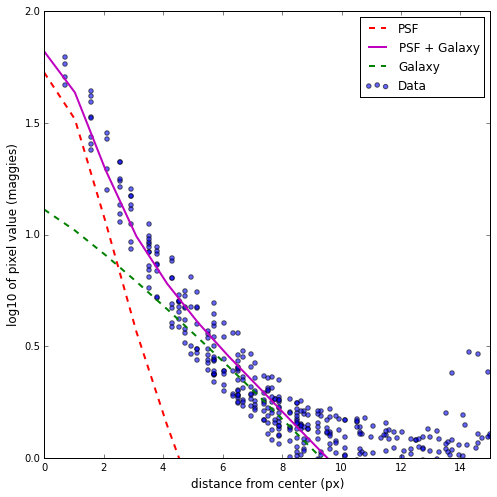

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:51: RuntimeWarning: invalid value encountered in log10
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:53: RuntimeWarning: invalid value encountered in log10


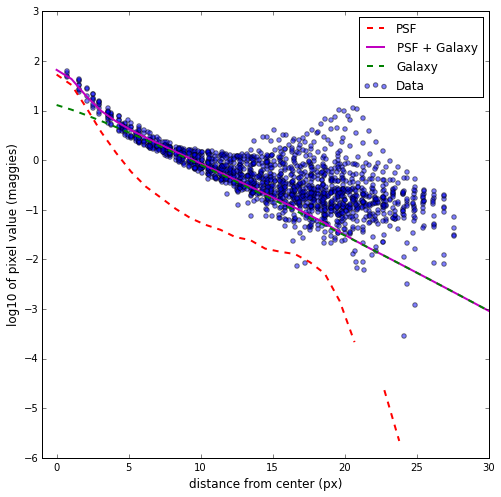

In [205]:
def psf_profile(data, center):
    y, x = np.indices((data.shape))
    r = np.sqrt((x - center[0])**2 + (y - center[1])**2)
    r = r.astype(np.int) # rounds distances to integers
    #print r
    
    tbin = np.bincount(r.ravel(), data.ravel())
    #print tbin
    nr = np.bincount(r.ravel())
    #print nr
    psfprofile = tbin / nr
    #print psfprofile
    return psfprofile 



# DON'T MULTIPLY B * Galaxy- already done above!



center = (21, 21)
psfplot = A * psf_profile(psf, center)

#print psfplot
pylab.figure(figsize=(8,8))
plt.plot(r, psfplot, 'r--', linewidth=2.0, label="PSF")
plt.plot(r, psfplot + galaxy, 'm-', linewidth=2.0, label="PSF + Galaxy")
plt.plot(r, galaxy, 'g--', linewidth=2.0, label="Galaxy")
plt.scatter(d, data, alpha=0.6, label="Data")
pylab.xlabel('distance from center (px)', size = 12)
pylab.ylabel('pixel value (maggies)', size = 12)
pylab.ylim([0, 70])
pylab.xlim([-1, 30]) 
plt.legend()
plt.show()


pylab.figure(figsize=(8,8))
plt.plot(r, np.log10(psfplot), 'r--', linewidth=2.0, label="PSF")
plt.plot(r, np.log10(psfplot + galaxy), 'm-', linewidth=2.0, label="PSF + Galaxy")
plt.plot(r, np.log10(galaxy), 'g--', linewidth=2.0, label="Galaxy")
plt.scatter(d, np.log10(data), alpha=0.6, label="Data")
pylab.ylim([0, 2])
pylab.xlim([-.01, 15]) 
pylab.xlabel('distance from center (px)', size= 12)
pylab.ylabel('log10 of pixel value (maggies)', size = 12)
plt.legend()
plt.show()

pylab.figure(figsize=(8,8))
plt.plot(r, np.log10(psfplot), 'r--', linewidth=2.0, label="PSF")
plt.plot(r, np.log10(psfplot + galaxy), 'm-', linewidth=2.0, label="PSF + Galaxy")
plt.scatter(d, np.log10(data), alpha=0.5, label="Data")
plt.plot(r, np.log10(galaxy), 'g--', linewidth=2.0, label="Galaxy")

pylab.ylim([-6,3])
pylab.xlim([-1, 30]) 
pylab.xlabel('distance from center (px)', size= 12)
pylab.ylabel('log10 of pixel value (maggies)', size = 12)
plt.legend()

plt.show()


# GRAOH chi^2 (y) vs R_e (x) for contrains and vs n (x) -- above
# go to chi^2 + 1 - the width gives the error -- above
# integrate the flux
# do same graph for other bands, but re and b_n and n are already picked

27.0


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in log10


(0, 10)

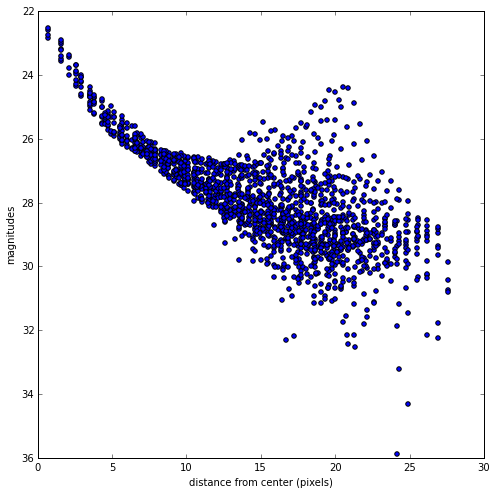

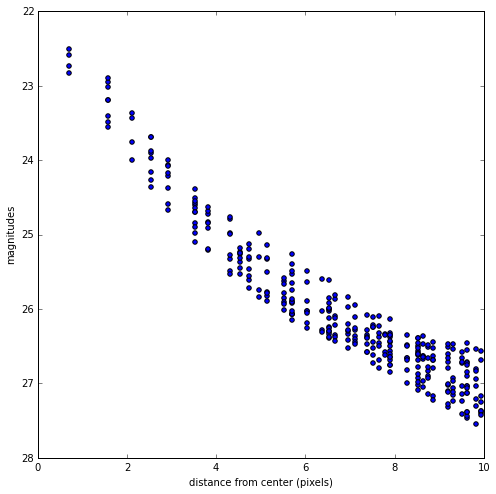

In [201]:
# convert from maggies to magnitudes
# 27.0 is average for HSC- find exact value for this image

# zero point calculation:
fluxmag0 = 63095734448.0194                   # given in header
zeropoint = 2.5*np.log10(fluxmag0)
print zeropoint


# magnitude calculation:
mags = zeropoint - 2.5*np.log10(smallerIm) 
#print mags


pylab.figure(figsize=(8,8))
plt.scatter(d, mags)    # changed to scatter from plot
pylab.xlabel('distance from center (pixels)')
pylab.ylabel('magnitudes')
pylab.ylim([36, 22])
pylab.xlim([0, 30]) # 30 pixels


pylab.figure(figsize=(8,8))
plt.scatter(d, mags)    # changed to scatter from plot
pylab.xlabel('distance from center (pixels)')
pylab.ylabel('magnitudes')
pylab.ylim([28, 22])
pylab.xlim([0, 10]) # 10 pixels


# .168 arcsec
# convert to flux, multiply by ^2, and then convert back to sq

27.0


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in log10


(0, 10)

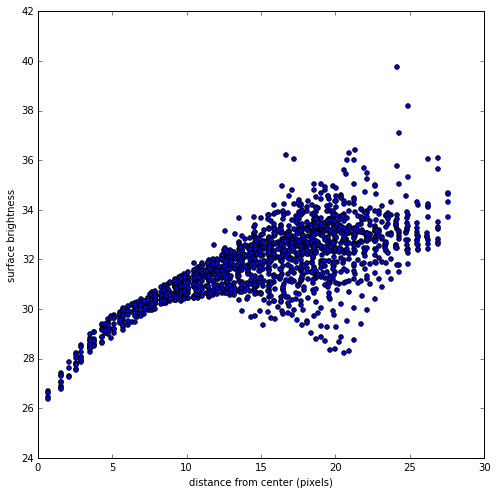

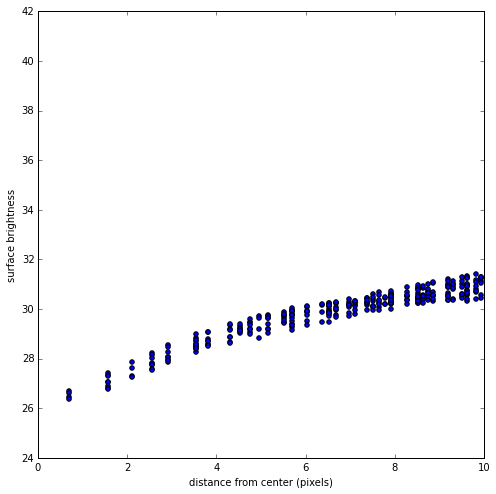

In [202]:
# convert from maggies to magnitudes
# 27.0 is average for HSC- find exact value for this image

# zero point calculation:
fluxmag0 = 63095734448.0194                   # given in header
zeropoint = 2.5*np.log10(fluxmag0)
print zeropoint


# magnitude calculation:
mags = zeropoint - 2.5*np.log10(smallerIm)   
#print mags

flux_perPixel = 10**(-2./5. * mags) * (3631. * 1E-23)
flux = flux_perPixel * (.168**2) # multiply - or divide- by area of each pixel?
# convert back to magnitudes

#surface_mag = -5./2 np.log10(3631. * 1E-23 / (flux))
surface_mag = -5./2 * np.log10(flux / (3631. * 1E-23 ))
pylab.figure(figsize=(8,8))
plt.scatter(d, surface_mag)    # changed to scatter from plot
pylab.xlabel('distance from center (pixels)')
pylab.ylabel('surface brightness')
#pylab.ylim([17.5, 11])
pylab.xlim([0, 30]) # 30 pixels


pylab.figure(figsize=(8,8))
plt.scatter(d, surface_mag)    # changed to scatter from plot
pylab.xlabel('distance from center (pixels)')
pylab.ylabel('surface brightness')
#pylab.ylim([14, 11])
pylab.xlim([0, 10]) # 10 pixels


# .168 arcsec
# convert to flux, multiply by ^2, and then convert back to sq

[[  4.18632506e-32   6.59914476e-32   9.98422584e-32 ...,   4.97616440e-33
    7.10733198e-33   1.81952243e-32]
 [  9.60824750e-32   9.00680757e-32   1.14567171e-31 ...,   7.50423133e-32
    7.53954553e-32   1.08115258e-31]
 [  1.16077975e-31   5.22462218e-32   7.39869310e-32 ...,   7.75946231e-32
    9.80120960e-32   2.80480563e-32]
 ..., 
 [  1.38370884e-31   1.02009447e-31   9.79716413e-32 ...,   1.94787628e-32
    2.42801385e-32   2.92610930e-32]
 [  1.14928506e-31   8.41920616e-32   8.35412198e-32 ...,   6.26697827e-32
               nan   4.63415836e-33]
 [  1.74455631e-32   6.19080565e-32   2.60273639e-32 ...,   4.24313259e-32
    5.13271674e-32   2.44107947e-32]]


(0, 10)

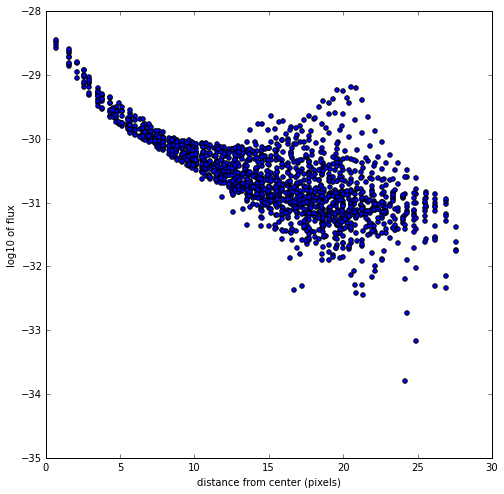

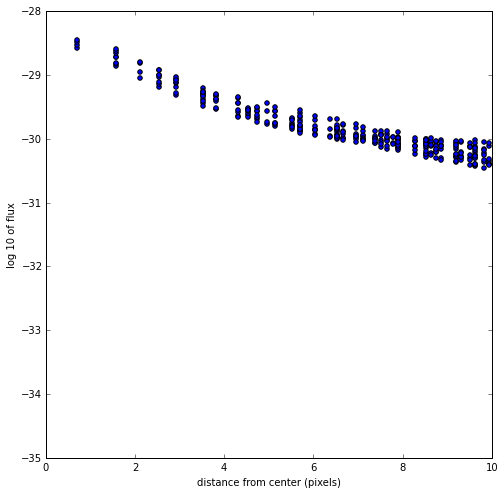

In [12]:
# mag = -5./2. * np.log10(flux / (3631. * 1E-23))
flux = 10**(-2./5. * mags) * (3631. * 1E-23)


print flux

pylab.figure(figsize=(8,8))
plt.scatter(d, np.log10(flux))    # changed to scatter from plot
pylab.xlabel('distance from center (pixels)')
pylab.ylabel('log10 of flux')
#pylab.ylim([-34, -28])
pylab.xlim([0, 30])


pylab.figure(figsize=(8,8))
plt.scatter(d, np.log10(flux))    # changed to scatter from plot
pylab.xlabel('distance from center (pixels)')
pylab.ylabel('log 10 of flux')
#pylab.ylim([-31, -28])
pylab.xlim([0, 10])


In [7]:
# plot y axis log
# normalization of psf doesn't matter - can change
# plot psf over above graph